Objetivo específico: Determinar parâmetros gerais (n° de animais nascidos, período para nascimento e sexagem) da criação animal no biotério do ICC, total e por linhagem, nos últimos 5 anos; 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Pergunta: Dados dos requisitantes, tipos de uso - associação com linhagens e demanda e tipos de ensaios. 
Necessário ter todas essas linhagens? -  Alessandra Aguiar.

Tipo de uso: Não temos informações sobre os Usuários Externos para qual tipo de uso, é realizada apenas a produção dos animais. Já os usuários internos da pra saber, porém, não pelo software BioterC

Quais são os pedidos externos e linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para cada linhagem?

Quais são os pedidos internos e as linhagens?
Qual tipo de uso para cada linhagem?
Qual período de pedidos para linhagem?

In [2]:
#lendo tabela referente a pedidos
ped = pd.read_csv('../tabelas_test/pedido_2019-06-18.csv', index_col='id')
ped.head()

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,1421625600,1411391851,666,1411392413
6,Hálisson Tesseroli Miot,halissontm@gmail.com,LPEP,-,Swiss,4,mes,2,5,0000000000,666,16,1-3-2-16,106,4-1-1-106,1412121600,1411583300,1412619416,1418727743
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,1420070400,1411491911,666,1411491957
5,Claudemir de Souza,claudemir.s@tecpar.br,VIROMOL,-,Swiss,11,dia,30,5,555555,666,14,1-2-7-14,113,NaN,1412899200,1411579273,1412620096,1422037389
7,Camila Oliveira,halissontm@gmail.com,LPEP,-,Balb/c,6,mes,2,5,0000000000,666,50,2-3-1-50,108,4-1-3-108,1412121600,1411583355,1412082161,1418727745


In [3]:
#Numero total de pedidos de usuários externos
ped[ped['lab'] == 'Usuário Externo']['num_ani'].sum()

4168

In [4]:
#Numero total de pedidos internos
ped[ped['lab'] != 'Usuário Externo']['num_ani'].sum()

1608

In [5]:
#vendo qual lab solicitou linhagem C3H por ser a linhagem com menos pedidos (excluindo DBA)
ped[ped['ling'] == 'C3H']

,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
190,Mateus Aoki,mateus.aoki@fiocruz.br,Usuário Externo,Genomica,C3H,4,dia,30,1,LW-XX/XX,666,2147483647,3-3-3-131<br />3-3-1-129<,2147483647,7-2-1-345<br />7-2-1-345<,1487559600,1487253541,1487683993,1487683993
249,Universidade Federal do Rio de Janeiro,NaN,Usuário Externo,Universidade Federal do Rio de Janeiro,C3H,10,dia,1,1,LW-XX/XX,666,2147483647,3-48<br />3-47<br />3-42<,2147483647,1-11<br />1-11<br />1-11<,1508205600,1508254445,1508254572,1508254572


Mesmo não havendo muitos pedidos pro grupo de Swiss, é a segunda linhagem mais pedida em comparação as outras, seguida do Balb/c.

In [6]:
#pedido de todos os labs externos e internos
ped['ling'].value_counts()

Balb/c       215
Swiss         82
C57BL/6       37
S129KO        21
C57BL06WT     15
Swiss-2        9
S129WT         6
Swiss-1        3
C3H            2
AG129          2
DBA/1J         1
Name: ling, dtype: int64

In [7]:
#Criando uma variável para receber o filtro só de usuários externos
pedidos_ext = ped[ped['lab'] == 'Usuário Externo']
pedidos_ext.head()

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Transformando todas as datas

datas = ['data_inicio', 'data_solic', 'data_forn', 'data_fim']

for d in datas:
    pedidos_ext[d] = pd.to_datetime(pedidos_ext[d], unit = 's') #indica o formato das datas
    
pedidos_ext.head()
#pedidos_ext[pedidos_ext['solic'] == 'Pryscilla Fanini Wowk']

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,solic,mail,lab,exter,ling,num_ani,time,total_time,doses,cep,cep_num_ani,id_orig,caix_est,id_fim,caix_exp,data_inicio,data_solic,data_forn,data_fim
id,,,,,,,,,,,,,,,,,,,
2,Tania,tschepainski@gmail.com,Usuário Externo,x,Balb/c,2,dia,3,2,83050140,666,666,AAA,666,AAA,2015-01-19,2014-09-22 13:17:31,1970-01-01 00:11:06,2014-09-22 13:26:53
4,Tania,tschepainski@gmail.com,Usuário Externo,.,Balb/c,2,dia,2,2,81300,666,666,AAA,666,AAA,2015-01-01,2014-09-23 17:05:11,1970-01-01 00:11:06,2014-09-23 17:05:57
9,Phileno,tschepainski@gmail.com,Usuário Externo,UEL,Swiss,25,mes,2,3,3433,666,20,1-3-6-20,1,1-1-1-1,2014-10-07,2014-09-29 13:33:14,2014-10-01 17:33:31,2014-10-01 17:33:31
10,Phileno,tschepainski@gmail.com,Usuário Externo,UEL,Balb/c,120,dia,40,12,00000,666,54,2-3-5-54,1,1-1-1-1,2014-12-01,2014-09-29 19:27:01,2014-10-01 17:51:45,2014-10-01 17:51:45
12,Phileno,tschepainski@gmail.com,Usuário Externo,UEL,C57BL06WT,120,dia,12,2,000000,666,96,3-4-5-96,1,1-1-1-1,2014-10-08,2014-10-01 18:14:28,2014-10-01 18:37:50,2014-10-01 18:37:50


In [8]:
#Verificando a soma dos animais dessa linhagem:
#ped[ped['ling'] == 'C57BL06WT']['num_ani'].sum()

In [9]:
#Verificando a soma dos animais dessa linhagem:
#ped[ped['ling'] == 'C57BL/6']['num_ani'].sum()

In [10]:
#Substituindo linhagem 'C57BL06WT' por 'C57BL/6' - "concatenando as linhagens"
pedidos_ext['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
pedidos_ext['ling'].value_counts()

/home/eloiza/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Balb/c     85
C57BL/6    49
Swiss      32
S129KO     14
S129WT      6
C3H         2
Name: ling, dtype: int64

In [11]:
#Após "concatenação" foi somado o valor da linhagem C57BL/6 (porem, não esta dando o valor correto da soma) 
pedidos_ext[pedidos_ext['ling'] == 'C57BL/6']['num_ani'].sum()

1820

In [12]:
#Substituindo linhagem 'Swiss-1', 'Swiss-2' por 'Swiss' - "concatenando as linhagens"
pedidos_ext['ling'].replace(['Swiss-1', 'Swiss-2'],'Swiss' ,inplace=True)
pedidos_ext['ling'].value_counts()

Balb/c     85
C57BL/6    49
Swiss      32
S129KO     14
S129WT      6
C3H         2
Name: ling, dtype: int64

In [13]:
#Ao somar a linhagem Swiss era para retornar um valor maior
pedidos_ext[pedidos_ext['ling'] == 'Swiss']['num_ani'].sum()

682

In [14]:
#Outra forma de filtrar os dados:
g = ped[ped['num_ani'] < 200].groupby('lab')
g.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim,data_inicio,data_solic,data_forn,data_fim
lab,,,,,,,,,,
BIOMOLTRIP,224,156,193,22560,6869968961,13190353124,71802993600,71786163926,58159769374,67350902093
IBMP,10,1,1,490,1950101194,11010112,1556766000,1556809204,1556809299,1558552428
Imunova,6,65,3,44,98010180,20,1557716400,1557766408,1557767676,666
LABCET,1,1,1,240,666,666,1557198000,1557168316,666,1557168341
LABGEN,227,347,47,8889,12886005479,4317689676,23646160800,23640214097,19237435121,22182583976
LABREG,425,998,289,35981,36728317470,21865725303,88466032800,88441663439,76670319104,88778818478
LBC,98,78,21,6294,8747957126,2043,23237848800,23235397438,20148119620,13962779242
LBL,21,24,35,4662,36010396,1140101793,9957722400,9950822560,9956973056,10068797052
LPEP,212,117,153,8430,19382374703,3297589337,31438562400,31411562918,29903878338,29966448016


In [15]:
g = pedidos_ext[pedidos_ext['num_ani'] < 200].groupby('ling')
g.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
Balb/c,1399,913,167,56610,66150954845,62397960910
C3H,14,31,2,1332,4294967294,4294967294
C57BL/6,1820,780,65,31892,79456899726,75173543075
S129KO,85,36,6,9324,11942755795,9922754927
S129WT,88,23,2,3996,6442451258,6442451230
Swiss,682,374,42,21312,45003787282,36689966697


In [16]:
#Ordem de linhagens mais pedidas por usuários externos
pedidos_ext['ling'].value_counts()

Balb/c     85
C57BL/6    49
Swiss      32
S129KO     14
S129WT      6
C3H         2
Name: ling, dtype: int64

In [17]:
ext = pedidos_ext[pedidos_ext['num_ani'] < 200].groupby('ling')
ext.sum()

,num_ani,total_time,doses,cep_num_ani,id_orig,id_fim
ling,,,,,,
Balb/c,1399,913,167,56610,66150954845,62397960910
C3H,14,31,2,1332,4294967294,4294967294
C57BL/6,1820,780,65,31892,79456899726,75173543075
S129KO,85,36,6,9324,11942755795,9922754927
S129WT,88,23,2,3996,6442451258,6442451230
Swiss,682,374,42,21312,45003787282,36689966697


In [18]:
#Determinar o período de data de pedido e data de fornecimento
pedido_df = pd.DataFrame(pedidos_ext['data_solic'])
pedido_df['ling'] = pedidos_ext['ling']
pedido_df['lab'] = pedidos_ext['lab']
pedido_df['num_ani'] = pedidos_ext['num_ani']
pedido_df['data_forn'] = pedidos_ext['data_forn']
pedido_df = pedido_df.set_index('data_solic')
pedido_df.head()

,ling,lab,num_ani,data_forn
data_solic,,,,
2014-09-22 13:17:31,Balb/c,Usuário Externo,2,1970-01-01 00:11:06
2014-09-23 17:05:11,Balb/c,Usuário Externo,2,1970-01-01 00:11:06
2014-09-29 13:33:14,Swiss,Usuário Externo,25,2014-10-01 17:33:31
2014-09-29 19:27:01,Balb/c,Usuário Externo,120,2014-10-01 17:51:45
2014-10-01 18:14:28,C57BL/6,Usuário Externo,120,2014-10-01 18:37:50


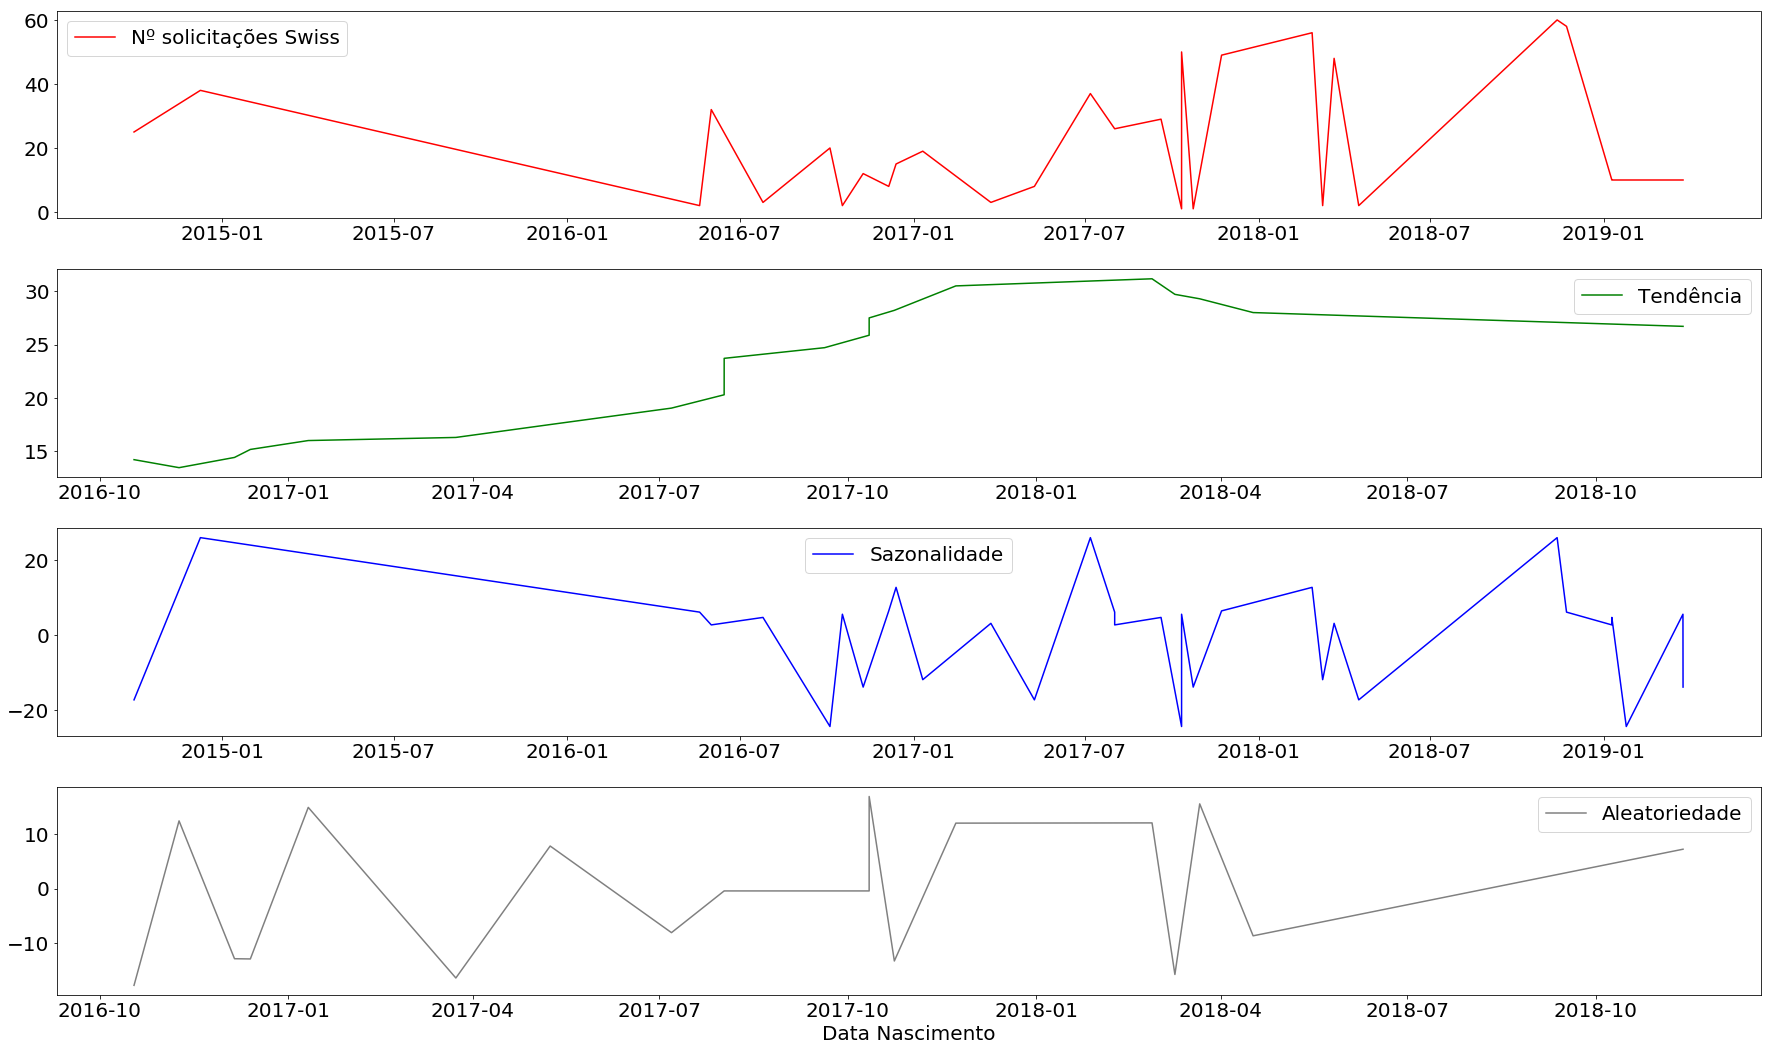

In [19]:
test_grafico = pedido_df[pedido_df['ling'] == 'Swiss']['num_ani'] 
decom = seasonal_decompose(test_grafico, freq=12)

# Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.subplot(4, 1, 1)
plt.plot(test_grafico, label = 'Nº solicitações Swiss', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()


In [20]:
pedidos_ext.loc[pedidos_ext.index.min(), 'data_solic']


Timestamp('2014-09-22 13:17:31')

In [21]:
inic = pedidos_ext.loc[pedidos_ext.index.min(), 'data_solic'] #loc: localizador - localizando a primeira data
fim = pedidos_ext.loc[pedidos_ext.index.max(), 'data_solic']

Gráfico solicitação de animais usuários externos por linhagem ano a ano

Text(0, 0.5, 'Soma de animais')

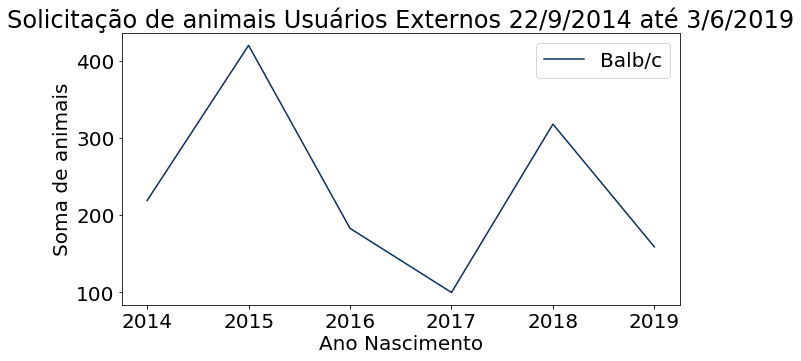

In [22]:
tsAno = pedido_df[pedido_df['ling'] == 'Balb/c']['num_ani'].resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados

tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu_r',
        title=f'Solicitação de animais Usuários Externos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Balb/c'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')

Gráfico solicitação de animais usuários externos por linhagem mês a mês

Text(0, 0.5, 'Soma Nascidos')

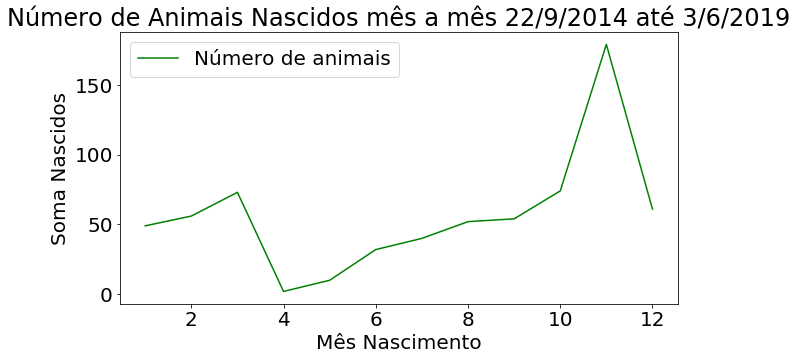

In [23]:
tsMes = pedido_df[pedido_df['ling'] == 'Swiss' ]['num_ani'].groupby([lambda x: x.month]).sum()

tsMes.plot(
        figsize=(10, 5),
        colormap='ocean',
        title=f'Número de Animais Nascidos mês a mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos')

Gráfico solicitação de animais usuários externos linhagens mais pedidas ano a ano

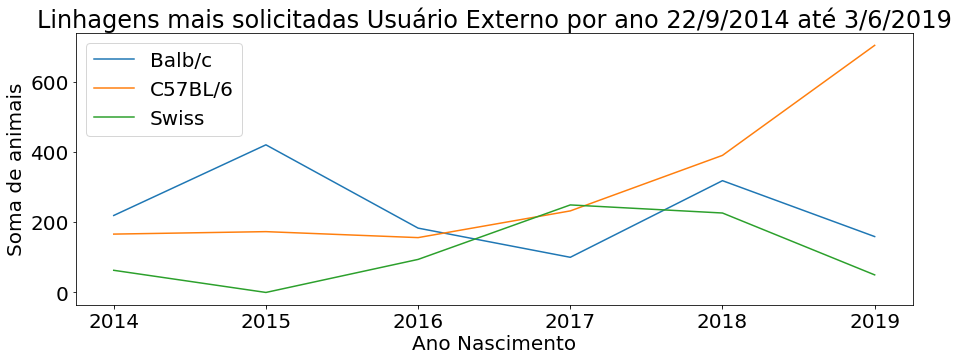

In [24]:
ling_mais_soli_ano = ['Balb/c','C57BL/6','Swiss']

plt.figure(figsize=(15, 5))
for l in ling_mais_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
plt.title(f'Linhagens mais solicitadas Usuário Externo por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_mais_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/13_pergunta_solic_usuarioexterno_mais_ano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários externos linhagens mais pedidas mês a mês

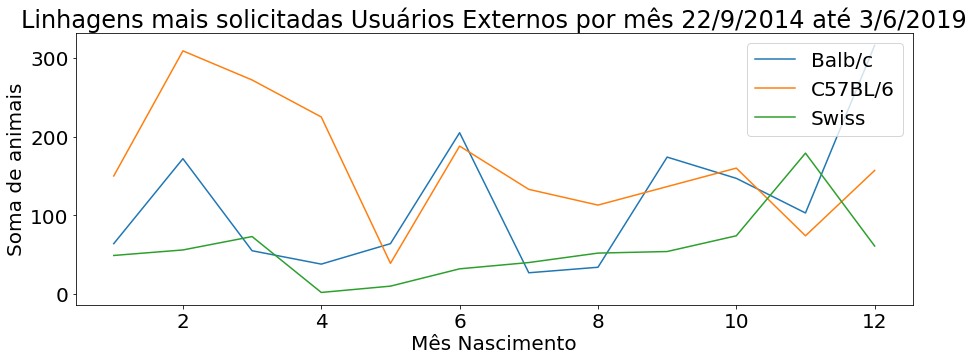

In [25]:
ling_mais_soli_mes = ['Balb/c', 'C57BL/6','Swiss']

plt.figure(figsize=(15, 5))
for c in ling_mais_soli_mes:
    pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()
    
plt.title(f'Linhagens mais solicitadas Usuários Externos por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_mais_soli_mes)
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/13_pergunta_solic_usuarioexterno_mais_mes.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários externos linhagens menos pedidas ano a ano

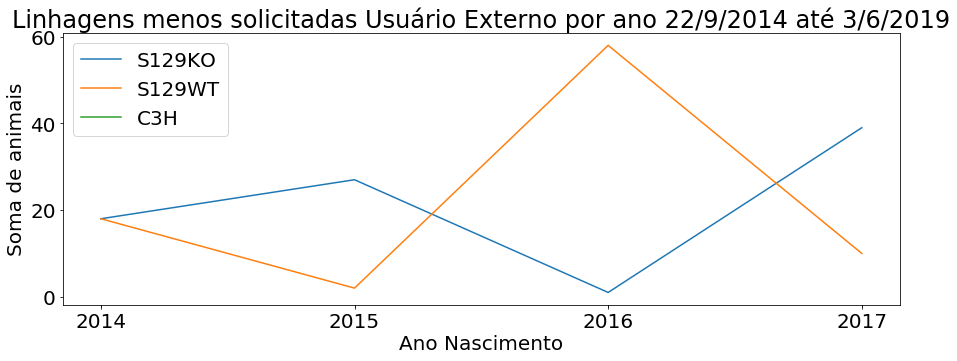

In [26]:
ling_menos_soli_ano = ['S129KO', 'S129WT', 'C3H' ]

plt.figure(figsize=(15, 5))
for l in ling_menos_soli_ano:
    pedido_df[pedido_df['ling'] == l]['num_ani'].resample('A').sum().plot()
plt.title(f'Linhagens menos solicitadas Usuário Externo por ano {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_menos_soli_ano)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/13_pergunta_solic_usuarioexterno_menos_ano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico solicitação de animais usuários externos linhagens menos pedidas mês a mês

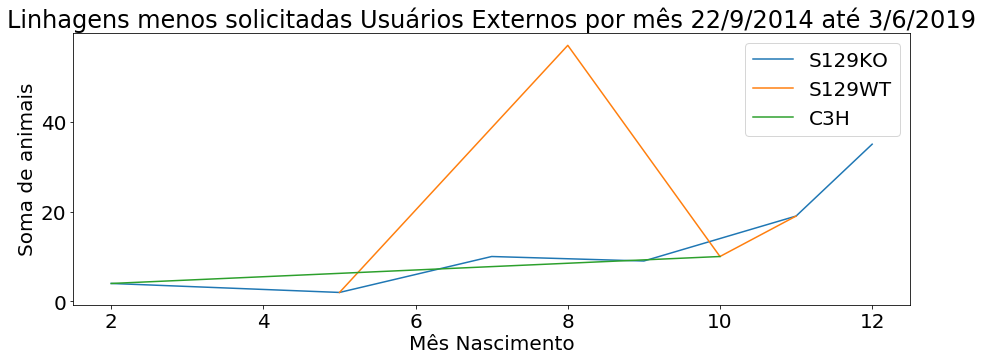

In [27]:
ling_menos_soli_mes = ['S129KO', 'S129WT', 'C3H' ]

plt.figure(figsize=(15, 5))
for c in ling_menos_soli_mes:
    pedido_df[pedido_df['ling'] == c]['num_ani'].groupby([lambda x: x.month]).sum().plot()
    
plt.title(f'Linhagens menos solicitadas Usuários Externos por mês {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}')
plt.legend(ling_menos_soli_mes)
plt.xlabel('Mês Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/13_pergunta_solic_usuarioexterno_menos_mes.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Primeiros Resultados: As solicitações de Usuários externos é quase 3 vezes maior que internas, com um total de 4168 solicitações no período de 5 anos. Nas solicitações de animais como um todo, a linhagem com mais evento é a Balb/c (isogênica), em seguida a linhagem Swiss (heterogênica e em terceiro lugar a linhagem C57BL/6. Ao filtrar os dados apenas para pedidos externos, a linhagem mais solicitada é o C57BL/6, em segundo lugar a linhagem Balb/c e em terceiro a linhagem Swiss.

Resultado por período anual (linhagens mais pedidas):
C57BL/6 - Solicitação desde 2014 se manteve constante entre os anos de 2015 a 2017, sendo sua produção superior nos anos de 2018 e 2019.

Balb/c - teve um pico maior de solicitação em 2015 e 2018 e teve uma menor produção no ano de 2016 e 2017.

Swiss - Entre 2015, 2016 e 2019 foi o menor período de solicitação e maior produção entre 2017 e 2018.

Resultado por períodos mensal(linhagens mais pedidas):
C57BL/6 - Solicitação constante entre todos os mêses, exceto mês de Maio que demonstra menor solicitação.

Balb/c - Menor solicitação entre os mêses de Abril, Julho e Agosto.

Swiss - Solicitação baixa em comparação as outras linhagens e Menor solicitação entre os mêses de Abril até Junho.

Resultado por período anual (linhagens menos pedidas):
S129 WT - Sem solicitações no ano de 2015, sendo solicitada no ano de 2016 e baixa em 2017 - Não há registros de solicitações pra 2018 e 2019.

S129KO - Com solicitação no ano de 2015 e 2017 sem solicitação em 2016. - Não há registros de solicitações pra 2018 e 2019.

C3H - Apenas uma solicitação externa de 4 camundongos 2019(confirmar) (não apresentado no gráfico).

Resultado por período mensal (linhagens menos pedidas):
S129 WT - Sem solicitação entre os mêses de Janeiro a Abril, com maior solicitação de Junho a Outubro.

S129 KO - Maior solicitação entre Outubro e Dezembro, nos demais meses se manteve constante.

C3H - Sem solicitações.